In [1]:
from modules.utils import Logger, paint

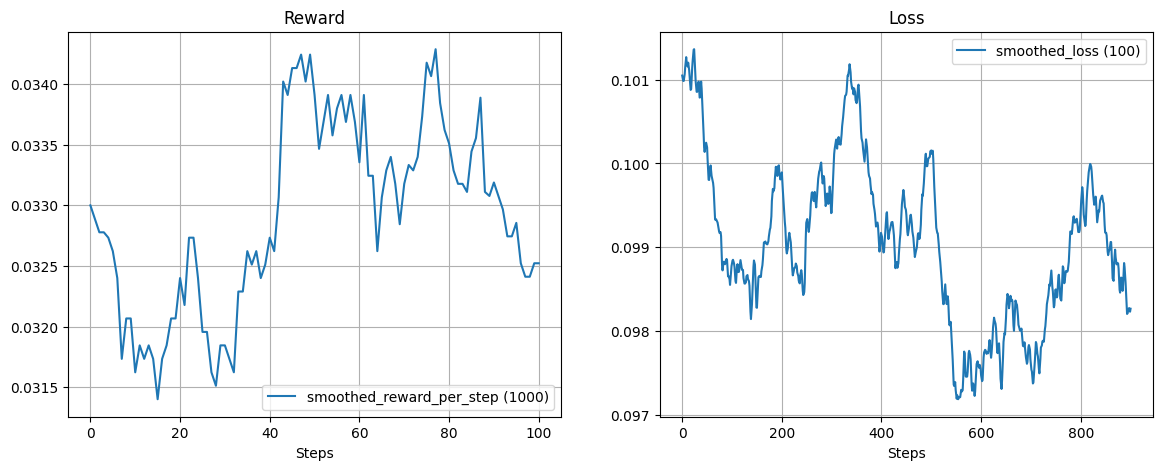

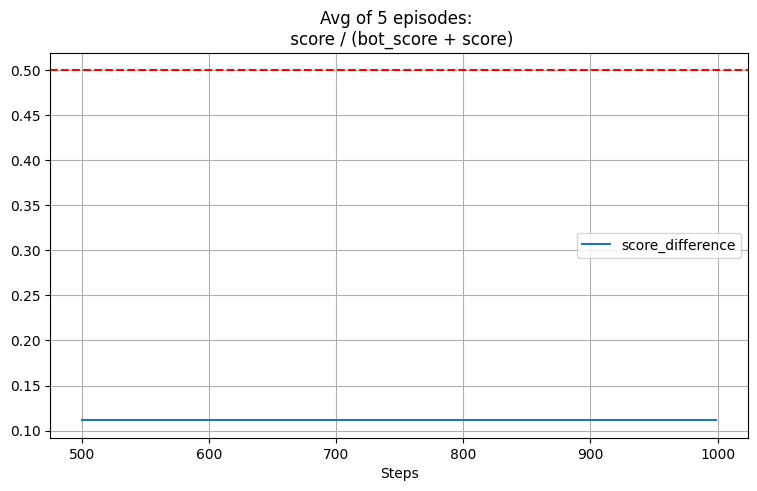

In [2]:
logger = Logger.load('logs/38')
paint(logger)

In [ ]:
from world.envs import VersusBotEnv
from world.realm import Realm
from world.map_loaders.two_teams import TwoTeamLabyrinthMapLoader, TwoTeamMapLoader, TwoTeamRocksMapLoader
from world.scripted_agents import ClosestTargetAgent
from world.utils import RenderedEnvWrapper


def get_env(global_config, train_config, difficulty, render_gif=False):
    assert 0 <= difficulty <= 1

    probs = [1 - difficulty, difficulty / 2, difficulty / 2]
    choice = np.random.choice(3, 1, p=probs)[0]

    if choice == 0:
        MapLoader = TwoTeamMapLoader
        kwargs_range = dict(
            move_proba=[0., 1.],
        )        

    elif choice == 1:
        MapLoader = TwoTeamLabyrinthMapLoader
        kwargs_range = dict(
            additional_links_max=[24, 12],
            additional_links_min=[3, 1],
            move_proba=[0., 1.],
        )

    else:
        MapLoader = TwoTeamRocksMapLoader
        kwargs_range = dict(
            rock_spawn_proba=[0.01, 0.15],
            additional_rock_spawn_proba=[0.0, 0.21],
            move_proba=[0., 1.],
        )

    generation_kwargs = dict()
    for k, v in kwargs_range.items():
        value = v[0] + (v[1] - v[0]) * difficulty
        value = int(value) if MapLoader == TwoTeamLabyrinthMapLoader else value
        generation_kwargs[k] = value

    base = VersusBotEnv(Realm(
        map_loader=MapLoader(**generation_kwargs),
        playable_teams_num=2,
        playable_team_size=global_config.n_predators,
        bots={1: ClosestTargetAgent()},
        step_limit=train_config.max_steps_for_episode
    ))
    return RenderedEnvWrapper(base) if render_gif else base

In [ ]:
from modules.utils import simulate_episode

simulate_episode()